# [Bitcoin Price Prediction - Group 13]


Group Members:

Anastasia Deniz Durak 29513

Adele Bizhanova 26243

Gamze Kantar 28938

Alım Gürbüz 28954




## Introduction


Cryptocurrency lets users to send and receive digital currency over the Internet in a secure and anonymous manner.  The current leading global provider of cryptocurrency is Bitcoin and according to the whitepaper issued by Bitcoin's developer, is defined as a peer-to-peer electronic money that allows payments to be transmitted directly from one party to another without the use of a financial institution. The Bitcoin network has attracted investors, entrepreneurs, and organizations in recent years by enabling service and product transactions. The goal of this study is to research how to accurately estimate the Bitcoin price by considering numerous factors that impact its worth.



### Installing Required Libraries and Mounting to Google Drive

In [ ]:
from google.colab import drive
drive.mount("./drive",force_remount= True)

path_prefix = "./drive/MyDrive/CS210 Project/"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
from scipy import stats

%matplotlib inline

Mounted at ./drive


### Utilized Datasets

Links:

https://drive.google.com/drive/u/0/folders/1KOkeQQIh_nqYpxPepn4U28cnT1LBo1nL

DS1:https://drive.google.com/file/d/1btA2_kd-kIaP3kGAQBdU5-HMDBQFIBTX/view?usp=sharing

DS2:https://drive.google.com/file/d/1eKqaFcZkJCwOoWPEi5uZh_hXMBTn9hPk/view?usp=sharing

DS3:https://drive.google.com/file/d/1RpDrKfU3ZTH8YJZNinsFgN3m8CdwR1cF/view?usp=sharing

DS4:https://drive.google.com/file/d/1d15n99Bkjw1LxLqznJp9OLlzxM-4Ksz_/view?usp=sharing

#### Dataset 1: BTC-USD.csv
Data of last 8 years approx. of the most famous cryptocurrency "Bitcoin" obtained from https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing

In [ ]:
ds1 = pd.read_csv(join(path_prefix, "BTC-USD.csv"))

Getting to know the dataset:

In [ ]:
ds1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
ds1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2755 non-null   object 
 1   Open       2755 non-null   float64
 2   High       2755 non-null   float64
 3   Low        2755 non-null   float64
 4   Close      2755 non-null   float64
 5   Adj Close  2755 non-null   float64
 6   Volume     2755 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.8+ KB


In [ ]:
ds1.shape

(2755, 7)

In [ ]:
ds1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

For each column, we'll look for missing values.
If a column has a high percentage of missing data, it should be removed or filled.


In [ ]:
ds1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The data does not contain missing values.

#### Dataset 2: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
bitstampUSD 1-minute data from 2012-01-01 to 2021-03-31 obtained from https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

In [ ]:
ds2 = pd.read_csv(join(path_prefix, "bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv"))

In [ ]:
ds2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds2.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
ds2.shape

(4857377, 8)

In [ ]:
ds2.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
ds2.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

It is seen that many NaN values are present. We should get rid of them.

In [ ]:
ds2=ds2.dropna()
ds2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


#### Dataset 3: coin_Bitcoin.csv
Historical daily price of BTC obtained from https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

In [ ]:
ds3 = pd.read_csv(join(path_prefix, "coin_Bitcoin.csv"))

In [ ]:
ds3.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
ds3.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [ ]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
ds3.shape

(2991, 10)

In [ ]:
ds3.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [ ]:
ds3.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

#### Dataset 4: BTC-2017min.csv
BITCOIN(BTC-USD) Minute, Hourly and Daily interval data. obtained from https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd

In [ ]:
ds4 = pd.read_csv(join(path_prefix, "BTC-2017min.csv"))

In [ ]:
ds4.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


In [ ]:
ds4.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,5.255990e+05,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,1.498997e+09,3948.408377,3952.208189,3943.751886,3948.339307,8.939796,4.143441e+04
std,9.103650e+06,3936.757966,3942.382649,3929.589942,3936.695963,20.779163,1.173633e+05
min,1.483229e+09,752.000000,752.810000,751.340000,752.040000,0.000000,0.000000e+00
25%,1.491113e+09,1197.450000,1197.980000,1197.040000,1197.460000,0.348564,7.167660e+02
50%,1.498997e+09,2567.440000,2569.370000,2565.350000,2567.170000,2.575998,7.249086e+03
75%,1.506881e+09,4535.565000,4539.405000,4531.030000,4535.000000,9.416233,3.294400e+04
max,1.514765e+09,19665.760000,19666.000000,19649.960000,19665.750000,1616.060001,5.145939e+06


In [ ]:
ds4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525599 entries, 0 to 525598
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        525599 non-null  int64  
 1   date        525599 non-null  object 
 2   symbol      525599 non-null  object 
 3   open        525599 non-null  float64
 4   high        525599 non-null  float64
 5   low         525599 non-null  float64
 6   close       525599 non-null  float64
 7   Volume BTC  525599 non-null  float64
 8   Volume USD  525599 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 36.1+ MB


In [ ]:
ds4.shape

(525599, 9)

In [ ]:
ds4.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [ ]:
ds4.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

## Exploratory Data Analysis


```
- Visualization of descriptive statistics of the dataset; visualize price trends based on time series and
volume.
- Visualize each feature separately based on time series
- Example visualizations of aggregated forms based on features (e.g. group the dataset based on open
and/or close prices with respect to volumes and compare distributions or centrality metrics of these
features for different open/close prices)
- Analysis of the highest and lowest price of all time with respect to volume
- Analyzing how high & low prices change with respect to time
- Comparison of open, close, high and low prices for selected time range and/or volume
- Introduction of at least four new features from additional datasets and visual explanations of them
- For both existing and new features, and usage of spatial visualization examples (as much as possible)
are expected.
```

###Visualization of descriptive statistics of the dataset; visualize price trends based on time series and volume.

Visualizing price trend based on time series, volume and additionally moving averages of volume. Utilizing dataset3.

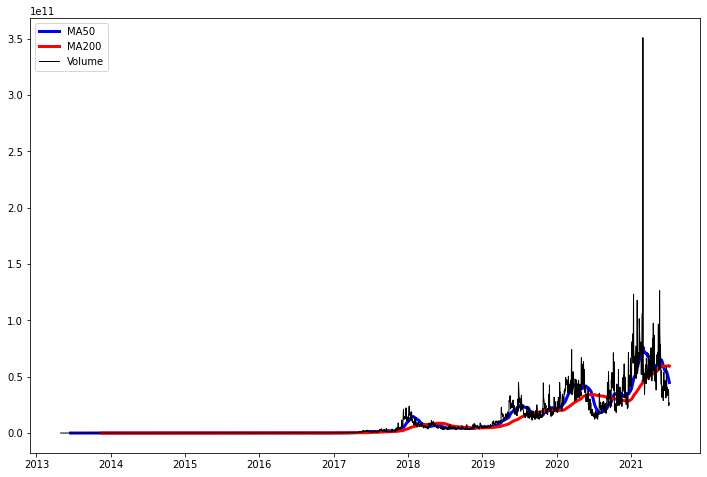

In [ ]:
ds3["Date"] = pd.to_datetime(ds3["Date"])
Date = ds3["Date"]


ds3['MA50'] = ds3['Volume'].rolling(50).mean()
ma50 = ds3['MA50']
ds3['MA200'] = ds3['Volume'].rolling(200).mean()
ma200 = ds3['MA200']
Volume = ds3['Volume']


plt.figure(figsize=(12, 8))
line1, = plt.plot(Date, ma50, label='MA50', linewidth=3.0, color = "blue")
line2, = plt.plot(Date, ma200, label='MA200', linewidth=3.0, color = "red")
line3, = plt.plot(Date, Volume ,label='Volume', linewidth=1.0, color = "black")

plt.legend(loc='upper right')

plt.legend(loc=2)
plt.draw()

###Visualize each feature separately based on time series

Features from the main dataset

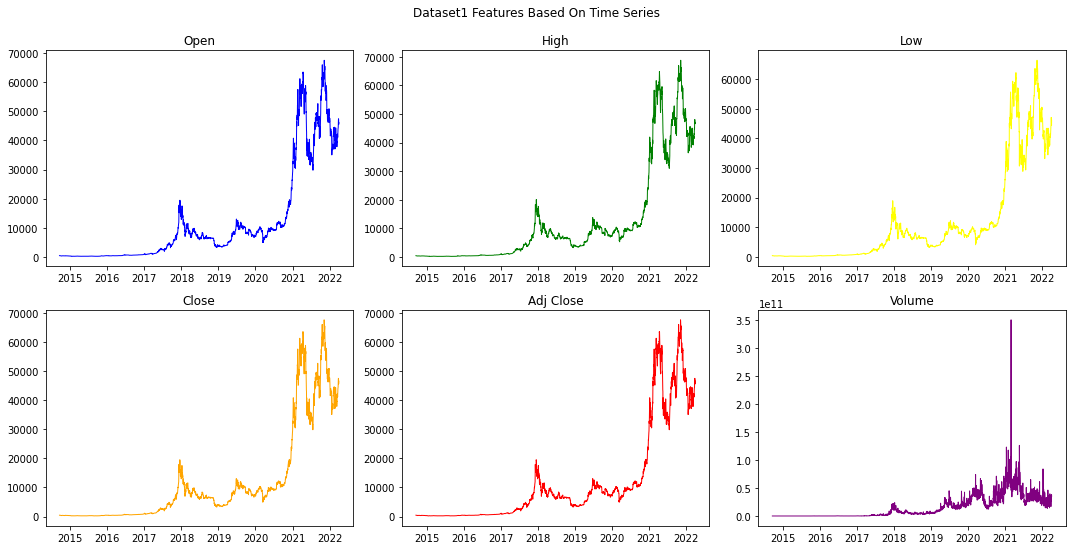

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))
plt.suptitle("Dataset1 Features Based On Time Series")

ds1["Date"] = pd.to_datetime(ds1["Date"])
Date = ds1["Date"]

Open = ds1["Open"]
ax[0, 0].plot(Date, Open, color="blue", linewidth=1.0)
ax[0, 0].set_title("Open")


High = ds1["High"]
ax[0, 1].plot(Date, High, color="green", linewidth=1.0)
ax[0, 1].set_title("High")

Low = ds1["Low"]
ax[0, 2].plot(Date, Low, color="yellow", linewidth=1.0)
ax[0, 2].set_title("Low")

Close = ds1["Close"]
ax[1, 0].plot(Date, Close, color="orange", linewidth=1.0)
ax[1, 0].set_title("Close")

Adj_Close = ds1["Adj Close"]
ax[1 , 1].plot(Date, Adj_Close, color="red", linewidth=1.0)
ax[1, 1].set_title("Adj Close")

Volume = ds1["Volume"]
ax[1, 2].plot(Date, Volume, color="purple", linewidth=1.0)
ax[1, 2].set_title("Volume")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Additional features from other datasets

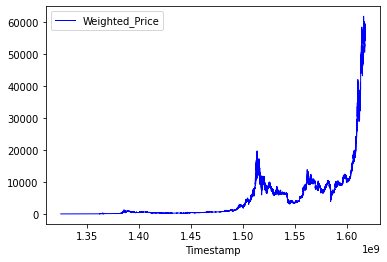

In [ ]:
#DS2 is a minute based dataset
#Every day has 1440 minuted, therefore we get every 1440th line to get separate days
ds2.iloc[::1440, :]
ds2.plot(x="Timestamp",y="Weighted_Price", color="blue", linewidth=1.0)


### Visualizations of Aggregated Forms Based on Features

When calculating average values or constructing a table of counts or sums, data aggregation and grouping allow us to produce summaries for presentation or analysis. It is a method based on the split-apply-combine strategy: Data should be divided into categories depending on specific criteria. Here, we group up the datset, close/open prices and analysed them with respect the time and volume.


Example visualizations of aggregated forms based on features (e.g. group the dataset based on open
and/or close prices with respect to volumes and compare distributions or centrality metrics of these
features for different open/close prices)

In [ ]:
open_grp = ds1.groupby(by="Open")
open_grp["Volume"].value_counts()

Open          Volume     
176.897003    81773504       1
200.050003    30085100       1
207.834000    23469700       1
209.070007    38421000       1
210.067993    61089200       1
                            ..
64978.890625  35880633236    1
65521.289063  30558763548    1
66002.234375  45908121370    1
66953.335938  48730828378    1
67549.734375  42357991721    1
Name: Volume, Length: 2755, dtype: int64

In [ ]:
close_grp=ds1.groupby(by="Close")
close_grp["Volume"].value_counts()

Close         Volume     
178.102997    97638704       1
199.259995    23469700       1
208.097000    38421000       1
209.843994    81773504       1
210.339005    30085100       1
                            ..
64995.230469  48730828378    1
65466.839844  25122092191    1
65992.835938  40788955582    1
66971.828125  42357991721    1
67566.828125  41125608330    1
Name: Volume, Length: 2755, dtype: int64

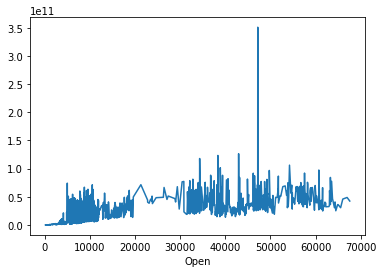

In [ ]:
ax = open_grp.mean()["Volume"].plot()

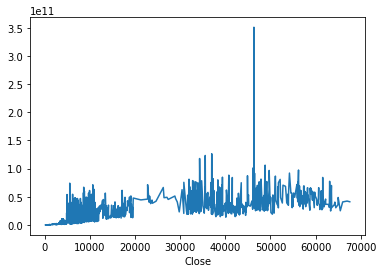

In [ ]:
ax = close_grp.mean()["Volume"].plot()

In [ ]:
openG = ds1.groupby('Open', as_index=False).mean()

mu = openG["Volume"].mean()
std = openG["Volume"].std()
size = openG["Volume"].size

print(size, mu, std)

2751 14909709017.067612 19949390230.95441


###Analysis of the highest and lowest price of all time with respect to volume

In [ ]:
#Highest
ds1.query('Close == Close.max()')


,Date,Open,High,Low,Close,Adj Close,Volume
2609,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330


In [ ]:
#Lowest
ds1.query('Close == Close.min()')

,Date,Open,High,Low,Close,Adj Close,Volume
119,2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704


###Analyzing how high & low prices change with respect to time

Two separate plots are created in order to compare them in different graph by plotting them together.
First two plots are: Date-High prices and Date-Low prices

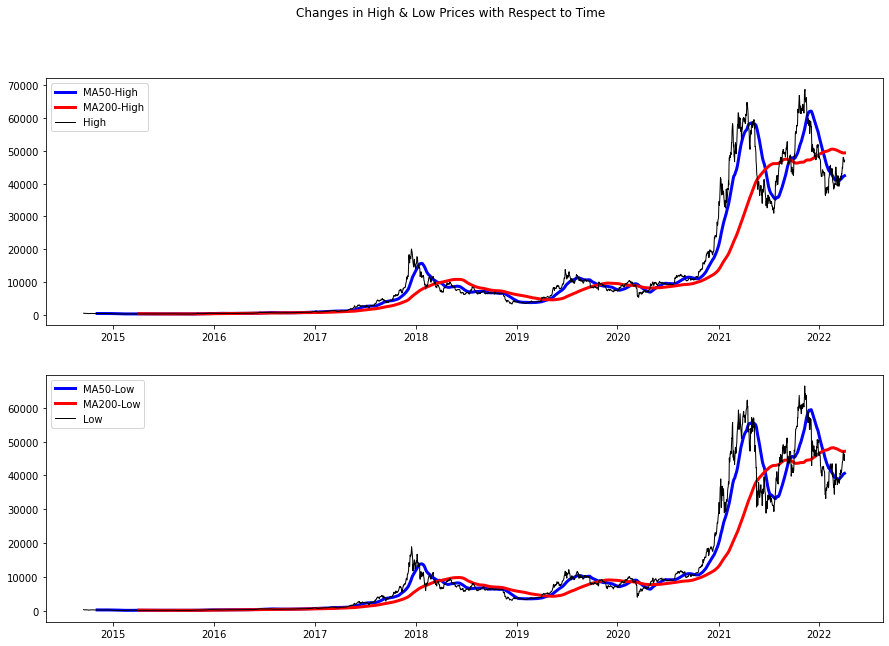

In [ ]:
fig, ax = plt.subplots(2, figsize=(15,10))
plt.suptitle("Changes in High & Low Prices with Respect to Time")


ds1["Date"] = pd.to_datetime(ds1["Date"])
Date = ds1["Date"]


ds1['MA50'] = ds1['High'].rolling(50).mean()
ma50 = ds1['MA50']
ds1['MA200'] = ds1['High'].rolling(200).mean()
ma200 = ds1['MA200']
High = ds1['High']

line1, = ax[0].plot(Date, ma50, label='MA50-High', linewidth=3.0, color = "blue")
line2, = ax[0].plot(Date, ma200, label='MA200-High', linewidth=3.0, color = "red")
line3, = ax[0].plot(Date, High ,label='High', linewidth=1.0, color = "black")

ax[0].legend(loc='upper right')

ax[0].legend(loc=2)

ds1['MA50'] = ds1['Low'].rolling(50).mean()
ma50l = ds1['MA50']
ds1['MA200'] = ds1['Low'].rolling(200).mean()
ma200l = ds1['MA200']
Low = ds1['Low']


line1, = ax[1].plot(Date, ma50l, label='MA50-Low', linewidth=3.0, color = "blue")
line2, = ax[1].plot(Date, ma200l, label='MA200-Low', linewidth=3.0, color = "red")
line3, = ax[1].plot(Date, Low ,label='Low', linewidth=1.0, color = "black")

ax[1].legend(loc='upper right')

ax[1].legend(loc=2)
plt.draw()

###Comparison of open, close, high and low prices for selected time range and/or volume

Four separate plots are created in order to compare them in different graph by plotting them together. First two plots are: Date-High prices and Date-Low prices. Third and Fourth plots show High/Low prices change in time.


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd58f1358c0> (for post_execute):


ValueError: ignored

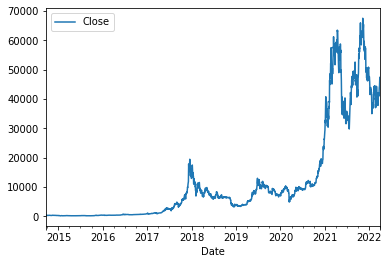

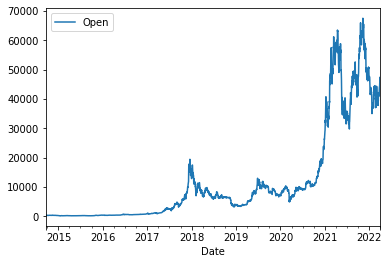

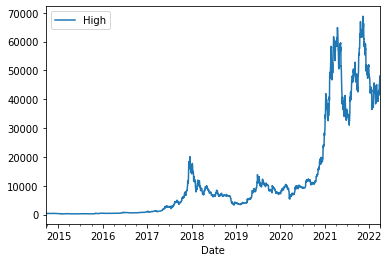

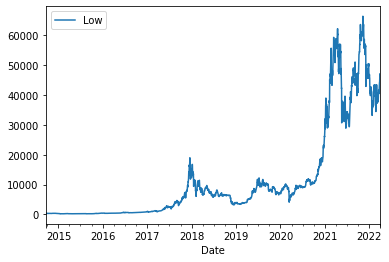

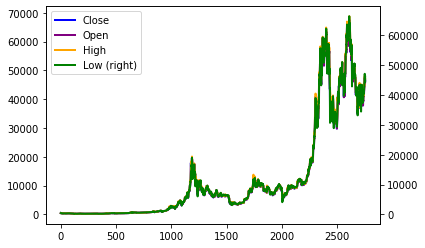

ValueError: ignored

In [ ]:
ds1.plot(x='Date', y='Close')
ds1.plot(x='Date', y='Open')
ds1.plot(x='Date', y='High')
ds1.plot(x='Date', y='Low')


fig, ax = plt.subplots()

ds1.plot(
    use_index=True,

    linewidth=2,
    y='Close',
    ax=ax,
    color='blue'

)

ds1.plot(
    use_index=True,

    linewidth=2,
    y='Open',
    ax=ax,
    color='Purple'

)
ds1.plot(
    use_index=True,

    linewidth=2,
    y='High',
    ax=ax,
    color='orange'

)

ds1.plot(
    use_index=True,
    y='Low',
    linewidth=2,
    ax=ax,
    secondary_y=True,
    color='green'
)

ds1.plot(

)

### Introduction of at least four new features from additional datasets and visual explanations of them

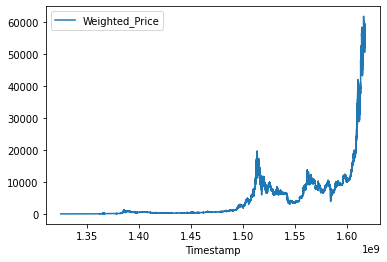

In [ ]:
ds2.plot(x="Timestamp",y="Weighted_Price")

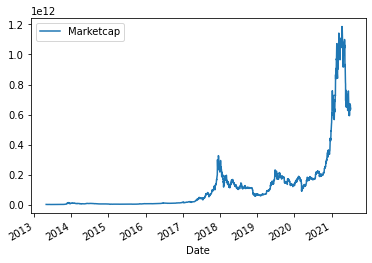

In [ ]:
ds3.plot(x="Date",y="Marketcap")

Future Improvements
<font color="gray">

- Graphs with date assigned x axises will be improved and cleaned.
- Statistical analysis and hypothesis parts will be done:
  - Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes to opening price of the next day.
  - Statistical tests to check if significant differences exist between different months of a single year and same month of different years
  - Statistical tests on selected features (e.g. investigate whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day)
  - Statistical tests to check how the close and volume features affects metrics like open prices of next day, and how open price affects high and low prices of that day
  -Utilizing at least four new features using extra datasets in hypothesis testing

- machine learning will be explored:
  - Prediction of opening price for a single day given all data of previous 30 days
  - Perform hyper-parameter tuning to increase model performance
  - Create a simple recommendation system to decide whether to buy Bitcoin given the open and close
prices, as well as volume, of previous 30 days
  - Predict trends of all features (open, high, low, close, adj close, volume) for the future time span
from 09 March 2022 to 09 September 2022
  - Utilize at least four new features using additional datasets in machine learning models



</font>


## Statistical Analysis & Hypothesis Testing
```
-	Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes to opening price of the next day.
-	Statistical tests to check if significant differences exist between different months of a single year and same month of different years
-	Statistical tests on selected features (e.g. investigate whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day)
-	Statistical tests to check how the close and volume features affects metrics like open prices of next day, and how open price affects high and low prices of that day
-	Utilizing at least four new features using extra datasets in hypothesis testing
```

Hypothesis Testing Framework: (From Lecture notes)

1-Set the hypotheses:

    *H0: μ = null value
    *HA: μ< or > or != null value

2-Check assumptions & conditions:

    *Independence: random sample/assignment, 10% sampling condition when sampling w/o replacement
    *Normality: Nearly normal population or n>= 30, no extreme skew-or use the t-distribution

3-Calculate a test statistic and a p-value

4-Make a decision, and interpret in context

    *If p-value < alpha, reject H0, data provide evidence for HA
    *If p-value > alpha, do not reject H0, data do not provide evidence for HA

https://towardsdatascience.com/significance-testing-2e5a0e546b3a

Note: Alpha = Significance level = P(Type 1 error - H0 true)

Type 1 error occurs when you reject the null hypothesis when you indeed should not have.
We will take significance level as 0.05. A significance level of 0.05 means that if we run the test 100 times, we can expect to incorrectly reject the null hypothesis 5 times out of 100. In other words, 5% of the time we are incorrectly reporting that the intervention has an impact when there is no actual effect.

In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.05

###1-Statistical tests to check how (or if) the volume and close features (in both single and **combined** manner) contributes to opening price of the next day.


    H0: Volume and close features do not contribute to opening price of the next day
    HA: Volume and close features do contribute to opening price of the next day

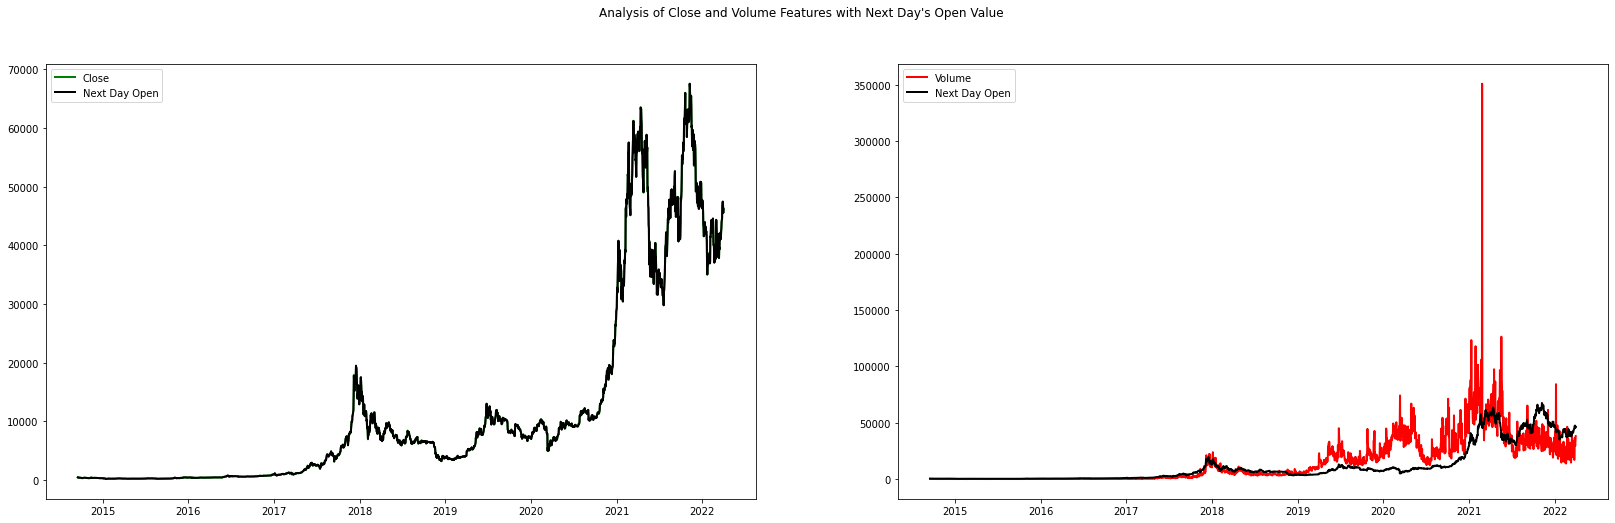

In [ ]:
#We're going to match volume and close to the 1 row shifted days (make sure to delete the first rows)
#SEPARATE
Volume = ds1["Volume"]
Close = ds1["Close"]
Next_Day_Open = ds1["Open"]
Date = ds1["Date"]
#Shift
Close = Close.shift(periods=1)
Volume = Volume.shift(periods=1)
Date = Date.shift(periods=1)

#Drop the first rows to avoid NaN problem
Next_Day_Open.drop(index=Next_Day_Open.index[0],
        axis=0,
        inplace=True)
Volume.drop(index=Volume.index[0],
        axis=0,
        inplace=True)
Close.drop(index=Close.index[0],
        axis=0,
        inplace=True)
Date.drop(index=Date.index[0],
        axis=0,
        inplace=True)

Volume = Volume/1000000

#Let's Graph :))
fig, ax = plt.subplots(1, 2, figsize=(28,8))
plt.suptitle("Analysis of Close and Volume Features with Next Day's Open Value")



line1 = ax[0].plot(Date, Close, label='Close', linewidth=2.0, color = "green")
line2 = ax[0].plot(Date, Next_Day_Open ,label='Next Day Open', linewidth=2.0, color = "black")

ax[0].legend(loc='upper right')
ax[0].legend(loc=2)


line1 = ax[1].plot(Date, Volume, label='Volume', linewidth=2.0, color = "red")
line2 = ax[1].plot(Date, Next_Day_Open ,label='Next Day Open', linewidth=2.0, color = "black")

ax[1].legend(loc='upper right')

ax[1].legend(loc=2)
plt.draw()

It can be seen that in the first graph we can't differentiate Close and Next Day Values but in the second graph a strong correlation as the latter is not present.
Let's show this with correlations.

In [ ]:
from scipy.stats import linregress

correlation = Close.corr(Next_Day_Open)
res1 = stats.linregress(Close, Next_Day_Open)

print("Close and Next Day Open Correlation: ",correlation)
print("Using Linear Regression Close-Next Day R value: ", res1.rvalue,"\n")

correlation2 = Volume.corr(Next_Day_Open)
res2 = stats.linregress(Volume, Next_Day_Open)
print("Volume and Next Day Open Correlation: ", correlation2)
print("Using Linear Regression Close-Next Day R value: ", res2.rvalue)


Close and Next Day Open Correlation:  0.9999940649525488
Using Linear Regression Close-Next Day R value:  0.9999940649525485 

Volume and Next Day Open Correlation:  0.7232937648174188
Using Linear Regression Close-Next Day R value:  0.7232937648174187


It's seen that the correlation between Close and Next Day Open features are near perfect. Therefore, we reject H0.

Eventhough it's not as strong as the previous one, Volume and Next Day Open show correlation too. Therefore, we reject H0.

###2-Statistical tests to check if significant differences exist between different months of a single year and same month of different years

In [ ]:
ds11 = pd.read_csv(join(path_prefix, "BTC-USD.csv"), index_col=0, parse_dates=True)
ds11.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


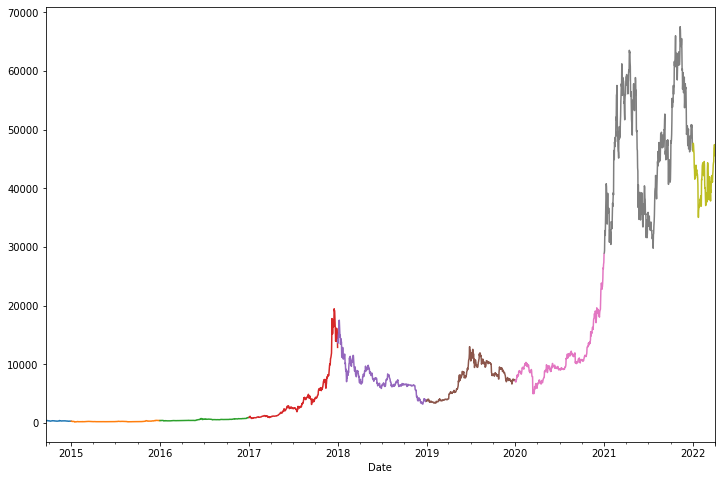

In [ ]:
ds11 = pd.read_csv(join(path_prefix, "BTC-USD.csv"), index_col=0, parse_dates=True)

years = ["2014","2015","2016","2017","2018","2019","2020","2021","2022"]

plt.figure(figsize=(12, 8))
for year in years:
  begin = year+"-01"
  end = year+"-12"

  ds11.loc[begin:end, 'Open'].plot()


####1-)Different months of a single year

    H0: Significant differences do not exist between different months of a single year. µ-diff = 0
    HA: Significant differences exist between different months of a single year. µ-diff != 0

Let's test on 2017 using ds4.

In [ ]:
#For the different months of the same year we can use ds4
ds41 = pd.read_csv(join(path_prefix, "BTC-2017min.csv"), index_col=1, parse_dates=True)
ds41.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2017-12-31 23:59:00,1514764740,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
2017-12-31 23:58:00,1514764680,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:57:00,1514764620,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:56:00,1514764560,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:55:00,1514764500,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


01 904.2903966240121
02 1057.9157041745577
03 1143.1468467722661
04 1199.3471114553506
05 1841.486853449423
06 2637.9978699820444
07 2460.9231788680763
08 3764.714934430086
09 4044.2200825298123
10 5212.631944659661
11 7540.443572554181
12 15176.62117358008


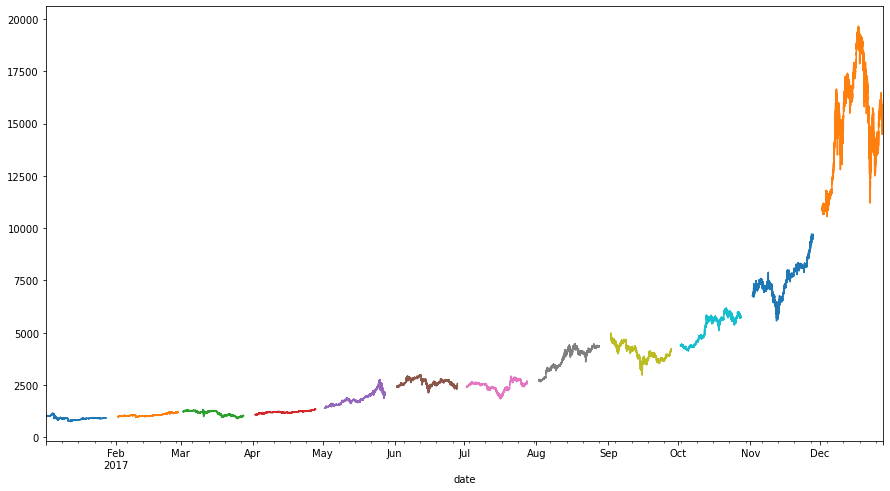

In [ ]:
#Let's get each months mean(The first 28 days)
months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
means = []

plt.figure(figsize=(15,8))
for month in months:
  begin = "2017-"+month+"-01"
  end = "2017-"+month+"-28"
  mean = ds41.loc[begin:end, 'open'].plot()
  mean = ds41.loc[begin:end, 'open'].mean()
  print(month, mean)
  means.append(mean)

We have a really small sample size. So we'll use t-distribution

In [ ]:
#Let's perform T test
#Point estimate = mean
#Standard Error = sdiff / sqr n
#our null value is 0 because it the null hypothesis we set mu diff = 0
import statistics
from scipy.stats import sem

mean = statistics.mean(means)
SE = sem(means) #Standard Error

T = (mean-0)/SE
print(T)

3.3342082587804147


In [ ]:
#Now let's find the p value
import scipy.stats

#find p-value
pval = scipy.stats.t.sf(abs(T), df=11)

if(pval<alpha):
  print(pval, "P-value is smaller than alpha(0.05).")
  print("We reject H0. Meaning that, significant differences exist between different months of a single year. (In our case, 2017)")
else:
  print(pval, "P-value is bigger than alpha(0.05).")
  print("We fail to reject H0. Meaning that, significant differences do not exist between different months of a single year. (In our case, 2017)")

0.003330691425037615 P-value is smaller than alpha(0.05).
We reject H0. Meaning that, significant differences exist between different months of a single year. (In our case, 2017)


####2-)Same month of different years

    H0: Significant differences do not exist between the same month of different years. µ-diff = 0
    HA: Significant differences exist between the same month of different years. µ-diff != 0

In [ ]:
ds11 = pd.read_csv(join(path_prefix, "BTC-USD.csv"), index_col=0, parse_dates=True)
ds11.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Let's test on March(03) among years [2015,2022]


2015 269.27841925806445
2016 417.2620328387097
2017 1133.2125755483871
2018 9156.591718193547
2019 3967.7403997096767
2020 6943.5070091935495
2021 54544.67817554837
2022 41889.14843770967


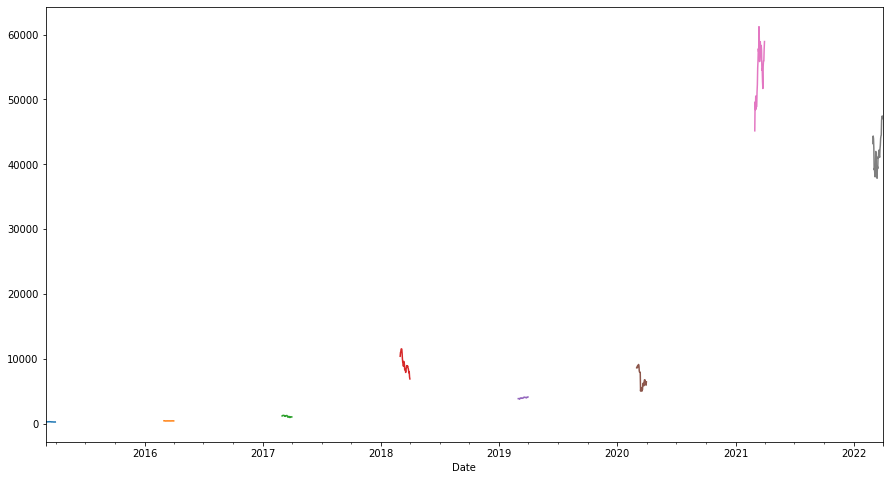

In [ ]:
years = ["2015","2016","2017","2018","2019","2020","2021","2022"]
means = []
plt.figure(figsize=(15,8))
for year in years:
  begin = year+"-03-01"
  end = year+"-03-31"
  mean = ds11.loc[begin:end, 'Open'].plot()
  mean = ds11.loc[begin:end, 'Open'].mean()
  print(year, mean)
  means.append(mean)

Once again we will use t-test due to small sample size.

In [ ]:
#Let's perform T test
#Point estimate = mean
#Standard Error = sdiff / sqr n
#our null value is 0 because it the null hypothesis we set mu diff = 0
import statistics
from scipy.stats import sem

mean = statistics.mean(means)
SE = sem(means) #Standard Error

T = (mean-0)/SE
print(T)

1.978580432891548


In [ ]:
#Now let's find the p value
import scipy.stats

#find p-value
pval = scipy.stats.t.sf(abs(T), df=11)

if(pval<alpha):
  print(pval, "P-value is smaller than alpha(0.05).")
  print("We reject H0. Meaning that, Significant differences do exist between the same month of different years. (In our case, March)")
else:
  print(pval, "P-value is bigger than alpha(0.05).")
  print("We fail to reject H0. Significant differences do not exist between the same month of different years. (In our case, March)")

0.036723647562311834 P-value is smaller than alpha(0.05).
We reject H0. Meaning that, Significant differences do exist between the same month of different years. (In our case, March)


###3-Statistical tests on selected features


As wee see from the below, statistical differences between high and low prices with respect to open and close prices on the same day are highly correlated. Since the percentages show 0.99 percentage of correltaion between those valuesd

In [ ]:
correlation = ds1.corr()
print(correlation)

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999526  0.999121  0.998834   0.998834  0.724416   
High       0.999526  1.000000  0.999051  0.999497   0.999497  0.728143   
Low        0.999121  0.999051  1.000000  0.999391   0.999391  0.716700   
Close      0.998834  0.999497  0.999391  1.000000   1.000000  0.723428   
Adj Close  0.998834  0.999497  0.999391  1.000000   1.000000  0.723428   
Volume     0.724416  0.728143  0.716700  0.723428   0.723428  1.000000   
MA50       0.979411  0.979007  0.978268  0.977967   0.977967  0.689693   
MA200      0.917130  0.915858  0.918140  0.916234   0.916234  0.577014   

               MA50     MA200  
Open       0.979411  0.917130  
High       0.979007  0.915858  
Low        0.978268  0.918140  
Close      0.977967  0.916234  
Adj Close  0.977967  0.916234  
Volume     0.689693  0.577014  
MA50       1.000000  0.949445  
MA200      0.949445  1.000000  


In [ ]:
openhigh = ds1[ds1["Open"] > 20000]
openlow= ds1[ds1["Open"] <= 20000]
openhigh.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
2283,2020-12-17,21308.351563,23642.660156,21234.675781,22805.162109,22805.162109,71378606374,16787.917715,12014.014004
2284,2020-12-18,22806.796875,23238.601563,22399.812500,23137.960938,23137.960938,40387896275,16976.312773,12078.758569
2285,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,38487546580,17170.118262,12145.588076
2286,2020-12-20,23861.765625,24209.660156,23147.710938,23477.294922,23477.294922,37844228422,17363.921875,12213.967398
2287,2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,45852713981,17534.541660,12277.137998


###4- Statistical tests to check how the close and volume features affects metrics like open prices of next day, and how open price affects high and low prices of that day


In [ ]:
openhigh["Close"]=openhigh.Close.shift(1)
openlow["Close"]=openlow.Close.shift(1)
openhigh["Volume"]=openhigh.Volume.shift(1)
openlow["Volume"]=openlow.Volume.shift(1)

In [ ]:
openhigh['Volume'] = openhigh['Volume'].div(1000)

openlow['Volume'] = openlow['Volume'].div(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
openhigh.drop(index=openhigh.index[0],
        axis=0,
        inplace=True)
openlow.drop(index=openlow.index[0],
        axis=0,
        inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def plot_bitcoin_value(feature): #functıon for plotting the histograms
  fig, ax = plt.subplots(1, 3, figsize=(16,4))
  openhigh[feature].hist(ax=ax[0], bins=200, color="blue", density=True)
  ax[0].set_title("The next day values more than 20000")
  ax[0].set_xlabel(feature)
  openlow[feature].hist(ax=ax[1], bins=200, color="green", density=True)
  ax[1].set_title("The next day values less than 20000")
  ax[1].set_xlabel(feature)
  sns.kdeplot(openhigh[feature], shade=True, label="more than 20000", ax=ax[2], color="blue")
  sns.kdeplot(openlow[feature], shade=True, label="0 to 20000", ax=ax[2], color="green")
  ax[2].set_title("Comparison with KDE")
  ax[2].set_xlabel(feature)
  plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

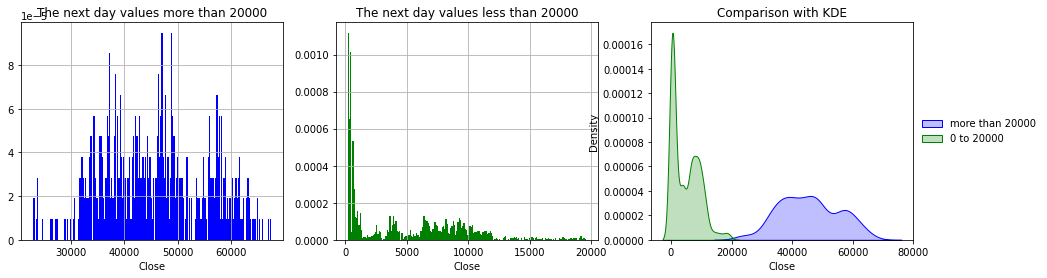

In [ ]:
plot_bitcoin_value("Close")

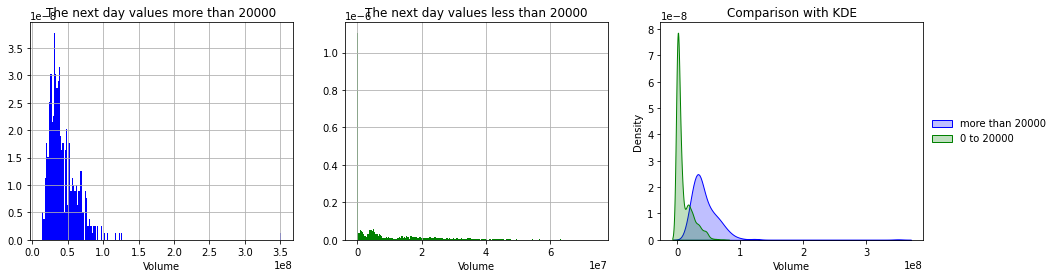

In [ ]:
plot_bitcoin_value("Volume")

In [ ]:
stats.levene(openhigh["Close"], openlow["Close"])

LeveneResult(statistic=674.1279142909177, pvalue=4.035119429856204e-133)

In [ ]:
from scipy.stats.stats import ttest_ind
ttest_ind(openhigh["Close"], openlow["Close"],equal_var=False)

Ttest_indResult(statistic=88.48351801370562, pvalue=1.057455068354e-312)

In [ ]:
stats.levene(openhigh["Volume"], openlow["Volume"])

LeveneResult(statistic=90.34994491225237, pvalue=4.191058447137713e-21)

In [ ]:
from scipy.stats.stats import ttest_ind
ttest_ind(openhigh["Volume"], openlow["Volume"],equal_var=False)

Ttest_indResult(statistic=30.60910925649237, pvalue=4.200309199699967e-119)

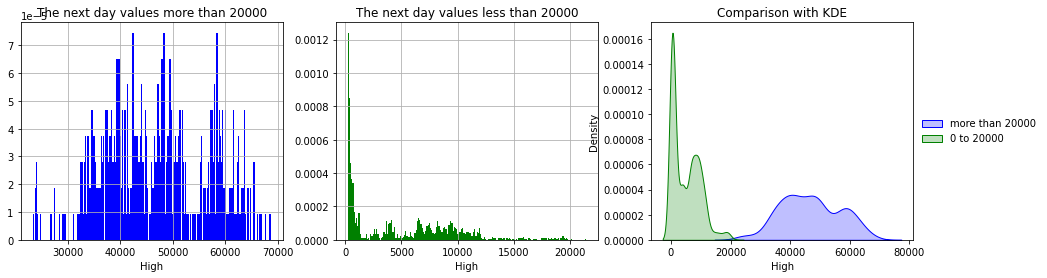

In [ ]:
plot_bitcoin_value("High")

In [ ]:
stats.levene(openhigh["High"], openlow["High"])

LeveneResult(statistic=636.9254333747298, pvalue=1.3794470632975723e-126)

In [ ]:
from scipy.stats.stats import ttest_ind
ttest_ind(openhigh["High"], openlow["High"],equal_var=False)

Ttest_indResult(statistic=90.15468938209656, pvalue=2.542121e-317)

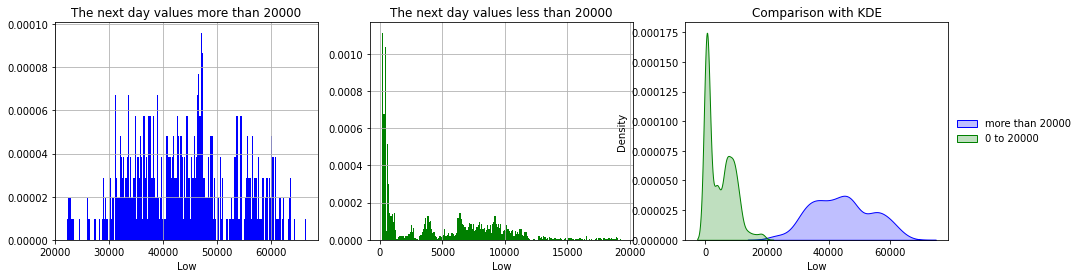

In [ ]:
plot_bitcoin_value("Low")

In [ ]:
stats.levene(openhigh["Low"], openlow["Low"])

LeveneResult(statistic=711.1015308523911, pvalue=1.5228720068708302e-139)

In [ ]:
from scipy.stats.stats import ttest_ind
ttest_ind(openhigh["Low"], openlow["Low"],equal_var=False)

Ttest_indResult(statistic=86.83605120517893, pvalue=3.7282252461422146e-308)

5- Utilizing at least four new features using extra datasets in hypothesis testing

## Machine Learning
```
-	Prediction of opening price for a single day given all data of previous 30 days
-	Perform hyper-parameter tuning to increase model performance
-	Create a simple recommendation system to decide whether to buy Bitcoin given the open and close prices, as well as volume, of previous 30 days
-	Predict trends of all features (open, high, low, close, adj close, volume) for the future time span from 09 March 2022 to 09 September 2022
-	Utilize at least four new features using additional datasets in machine learning models

```

###1- Prediction of opening price for a single day given all data of previous 30 days


In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data fetching
from pandas_datareader import data as pdr


In [ ]:

ds11= pd.DataFrame(ds1)
ds11.merge(ds2)
ds11.merge(ds3)
from google.colab import data_table
data_table.disable_dataframe_formatter()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1218: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [ ]:
del ds11 ["Date"]
del ds11 ["MA50"]
del ds11["MA200"]
y = ds11['Open']
x = ds11.drop('Open', axis=1, inplace=False)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LogisticRegression()

y_train = preprocessing.LabelEncoder().fit_transform(y_train)

model.fit(X_train_scaled, y_train)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))



### 2-Perform hyper-parameter tuning to increase model performance

In [ ]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()


pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('logistic_Reg', logistic_Reg)])

n_components = list(range(1,x.shape[1]+1,1))

C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

parameters = dict(pca__n_components=n_components,logistic_Reg__C=C,logistic_Reg__penalty=penalty)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train_scaled, y_train)

print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])




ValueError: ignored

###3- A simple recommendation system to decide whether to buy Bitcoin given the open and close prices, as well as volume, of previous 30 days


In [ ]:
prediction_days = 1 #set value
volume_ds11= pd.DataFrame(ds11)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
volume_ds11= pd.DataFrame(ds11)


del volume_ds11["Low"]
del volume_ds11["High"]
del volume_ds11["Close"]
del volume_ds11["Adj Close"]
del volume_ds11["Open"]


volume_ds11 = volume_ds11['2022-01-01':'2022-02-02']

volume_ds11['Volume'] = np.log(volume_ds11['Volume'])
volume_ds11['Prediction'] = volume_ds11[['Volume']].shift(-prediction_days)

y = np.array(volume_ds11['Prediction'])
y = y[:-prediction_days]


X = np.array(volume_ds11.drop(['Prediction'],1))
X= X[:len(volume_ds11)-prediction_days]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

prediction_days_array = np.array(volume_ds11.drop(['Prediction'],1))[-prediction_days:]

svr_rbf = SVR(kernel='rbf', C=1000, gamma=1)
svr_rbf.fit(x_train, y_train)

svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("the svr_rbf accuracy is : ", svr_rbf_confidence)
svm_prediction = svr_rbf.predict(prediction_days_array)
print("the svm_prediction is:" ,svm_prediction)